In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load original image

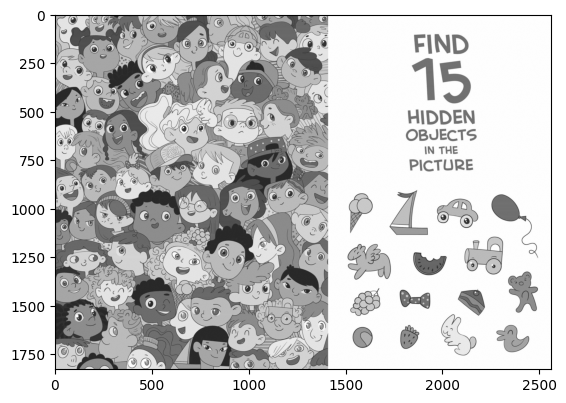

In [95]:
#Load the the original image
img = cv2.imread('/content/drive/MyDrive/Finding/finding.jpg', 0)
plt.imshow(img, cmap='gray')

#Extract object and store to list

##Target Image

In [96]:
img.shape

(1829, 2560)

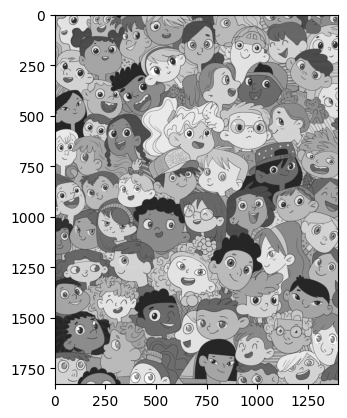

In [97]:
target = img[0:1829, 0:1400]
plt.imshow(target, cmap='gray')

##Objects

In [98]:
objects = []

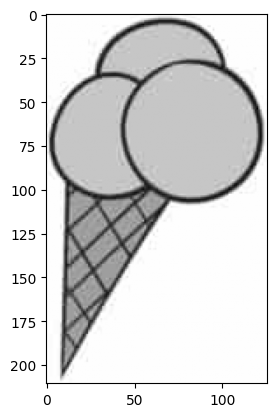

In [99]:
#Ice_cream
ice_cream = img[921:1132, 1512:1638]
plt.imshow(ice_cream, cmap='gray')
objects.append(('Ice Cream', ice_cream))

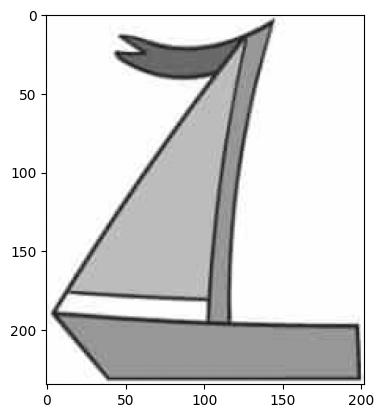

In [100]:
#Sailboat
sailboat = img[905:1140, 1720:1922]
plt.imshow(sailboat, cmap='gray')
objects.append(('Sailboat', sailboat))

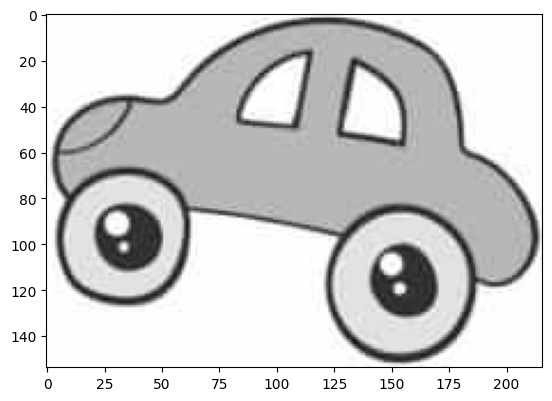

In [101]:
#Car
car = img[950:1104, 1965:2181]
plt.imshow(car, cmap='gray')
objects.append(('Car', car))

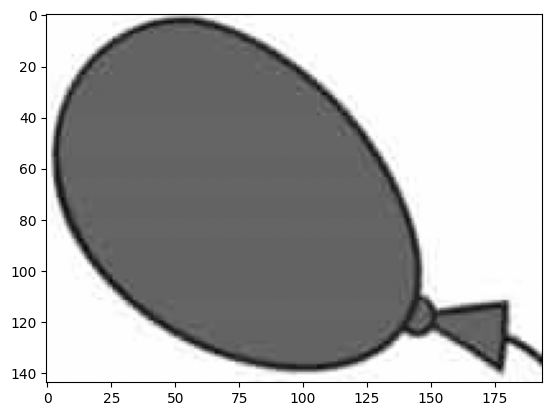

In [102]:
#Balloon
balloon = img[928:1072, 2246:2440]
plt.imshow(balloon, cmap='gray')
objects.append(('Balloon', balloon))

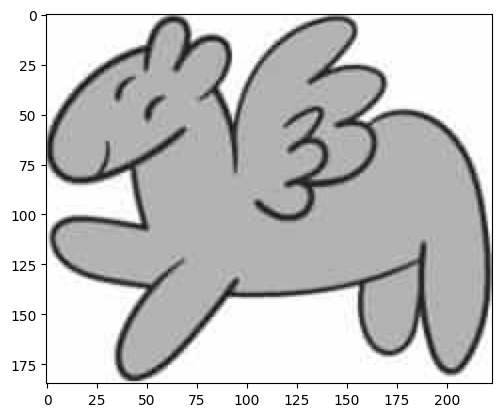

In [103]:
#Horse
horse = img[1184:1369, 1507:1730]
plt.imshow(horse, cmap='gray')
objects.append(('Horse', horse))

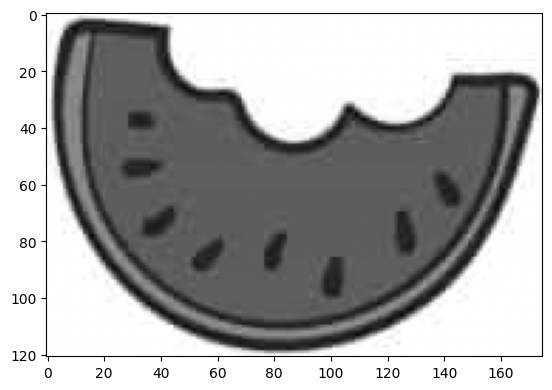

In [104]:
#Watermelon
watermelon = img[1226:1347, 1843:2018]
plt.imshow(watermelon, cmap='gray')
objects.append(('Watermelon', watermelon))

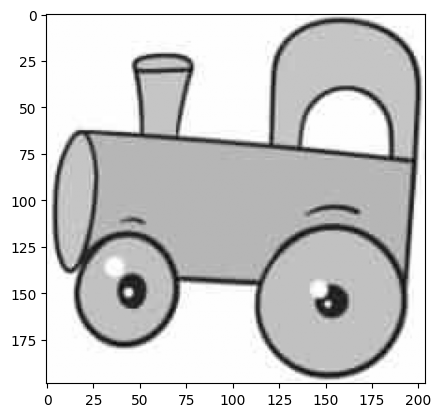

In [105]:
#Train
train = img[1145:1344, 2106:2310]
plt.imshow(train, cmap='gray')
objects.append(('Train', train))

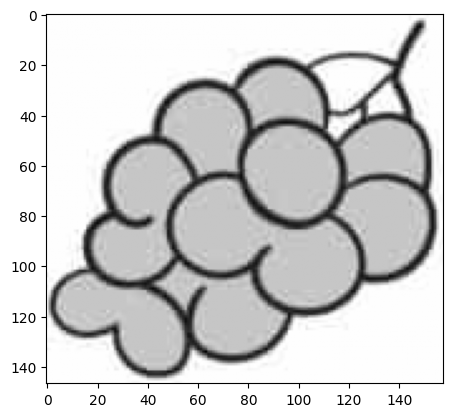

In [106]:
#Grape
grape = img[1410:1557, 1520:1678]
plt.imshow(grape, cmap='gray')
objects.append(('Grape', grape))

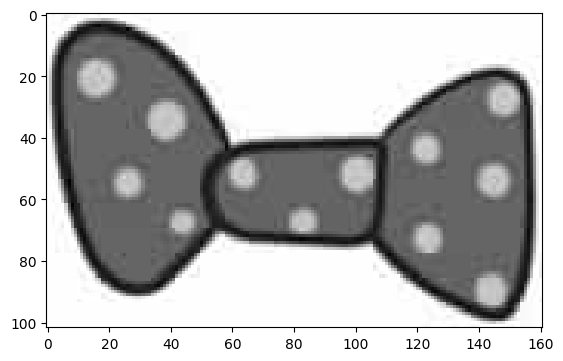

In [107]:
#Tie
tie = img[1418:1520, 1774:1935]
plt.imshow(tie, cmap='gray')
objects.append(('Tie', tie))

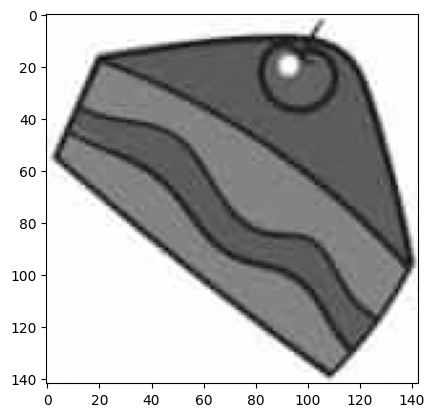

In [108]:
#Cake
cake = img[1414:1556, 2073:2216]
plt.imshow(cake, cmap='gray')
objects.append(('Cake', cake))

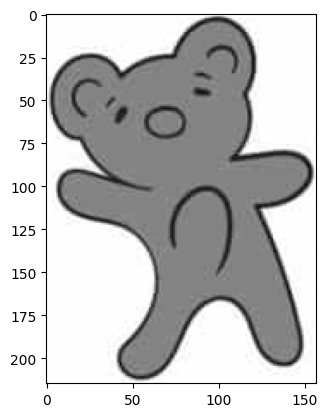

In [109]:
#Teddy
teddy = img[1325:1540, 2332:2489]
plt.imshow(teddy, cmap='gray')
objects.append(('Teddy', teddy))

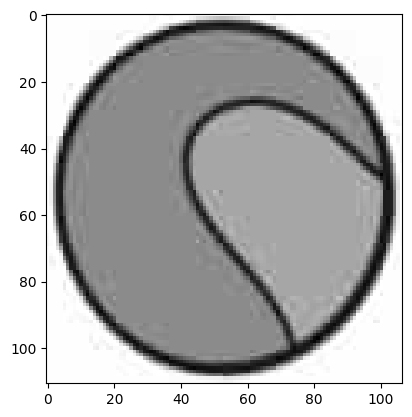

In [110]:
#Tennis
tennis = img[1611:1722, 1531:1638]
plt.imshow(tennis, cmap='gray')
objects.append(('Tennis', tennis))

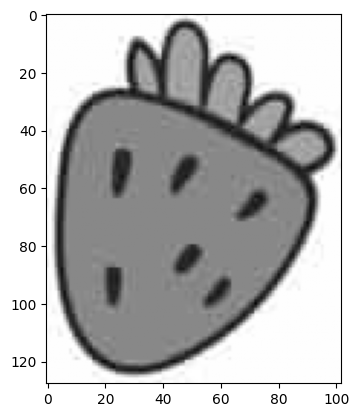

In [111]:
#Strawberry
strawberry = img[1600:1728, 1776:1878]
plt.imshow(strawberry, cmap='gray')
objects.append(('Strawberry', strawberry))

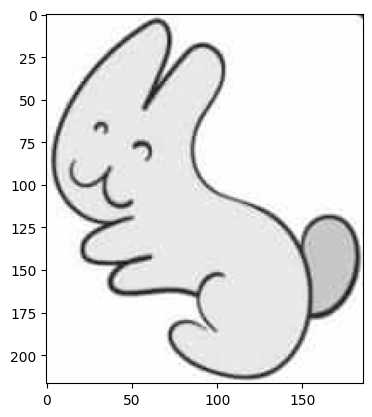

In [112]:
#Cat
cat = img[1544:1761, 1986:2172]
plt.imshow(cat, cmap='gray')
objects.append(('Cat', cat))

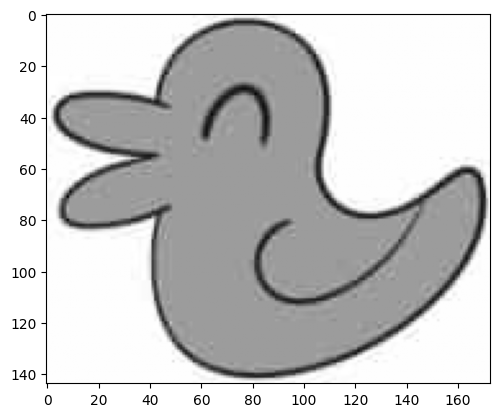

In [113]:
#Duck
duck = img[1600:1744, 2271:2444]
plt.imshow(duck, cmap='gray')
objects.append(('Duck', duck))

#Template Matching

In [114]:
def resize_template(template, scale):
    """Resize the template based on the scale."""
    return cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

def template_match(target, resized_template):
    """Match the resized template with the target and return the match score and location."""
    res = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    return max_val, max_loc

def improved_template_matching(target, template, threshold=0.4):
    """Perform template matching with scaling."""
    best_match = None
    best_score = -np.inf
    best_scale = 1.0

    for scale in np.linspace(0.4, 1, 100):
        resized_template = resize_template(template, scale)
        score, match_location = template_match(target, resized_template)

        if score > best_score:
            best_score = score
            best_match = match_location
            best_scale = scale

    # Return match if score exceeds threshold
    return (best_match, best_scale) if best_score >= threshold else (None, None)

def draw_results(target, objects, results):
    """Draw rectangles around detected objects."""
    target_copy = cv2.cvtColor(target.copy(), cv2.COLOR_GRAY2RGB)

    for i, (location, scale) in results:
        obj_name, obj_image = objects[i]
        w, h = int(obj_image.shape[1] * scale), int(obj_image.shape[0] * scale)
        x, y = location
        cv2.rectangle(target_copy, (x, y), (x + w, y + h), (225, 0, 0), 2)
        cv2.putText(target_copy, obj_name, (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.9, (225, 0, 0), 2)

    return target_copy

##Normalized Correlation Coefficient

In [115]:
def find_objects(target, objects, threshold=0.4):
    results = []

    for i, (obj_name, obj_image) in enumerate(objects):
        location, scale = improved_template_matching(target, obj_image, threshold)
        if location:
            results.append((i, (location, scale)))

    return results

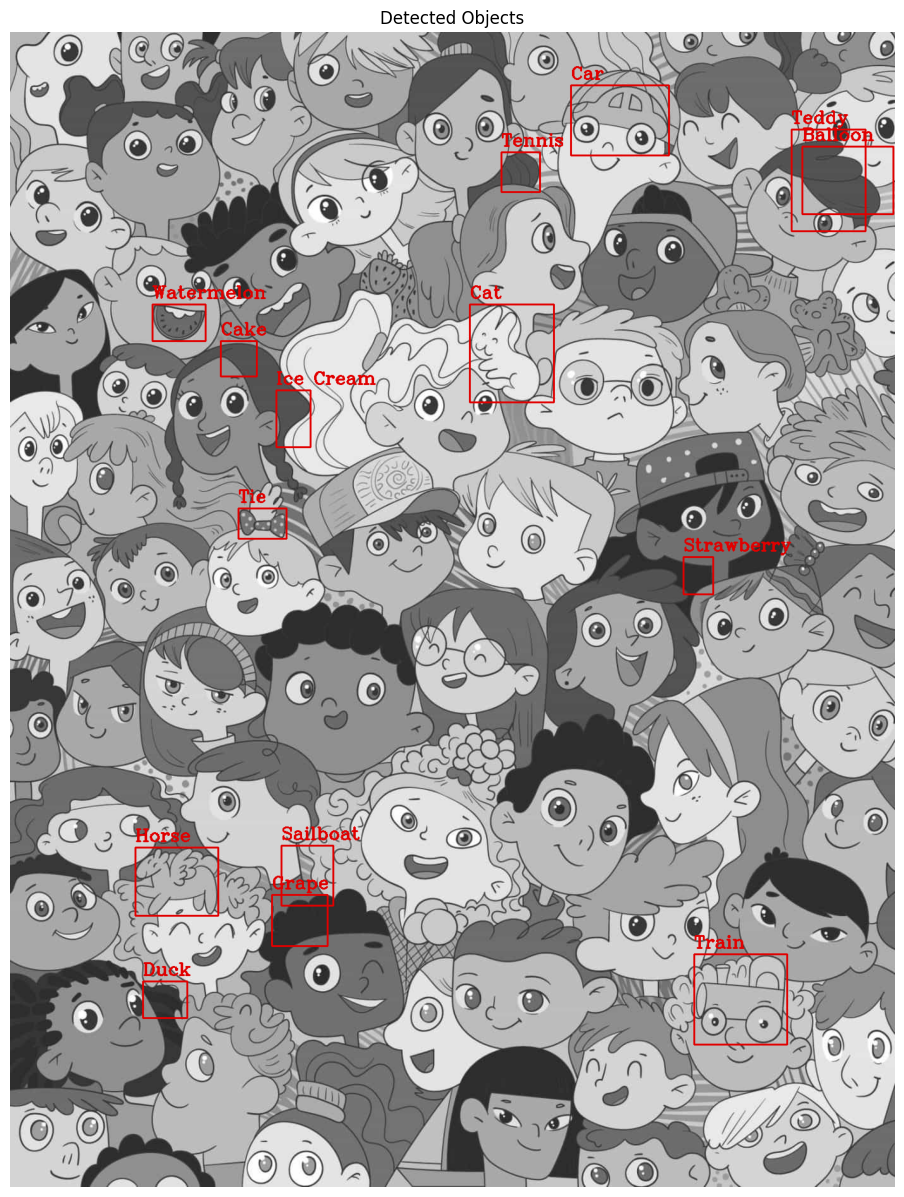

In [116]:
results = find_objects(target, objects)
result_image = draw_results(target, objects, results)

# Display the result
plt.figure(figsize=(15, 15))
plt.imshow(result_image)
plt.title('Detected Objects')
plt.axis('off')
plt.show()

##Extract image edge

In [117]:
def edge_detection(image, kernel_size=7, canny_threshold1=0, canny_threshold2=50, dilation_iterations=1):
    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_threshold1, canny_threshold2)

    # Apply dilation to strengthen and connect edges
    kernel = np.ones((2, 2), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=dilation_iterations)

    return dilated_edges

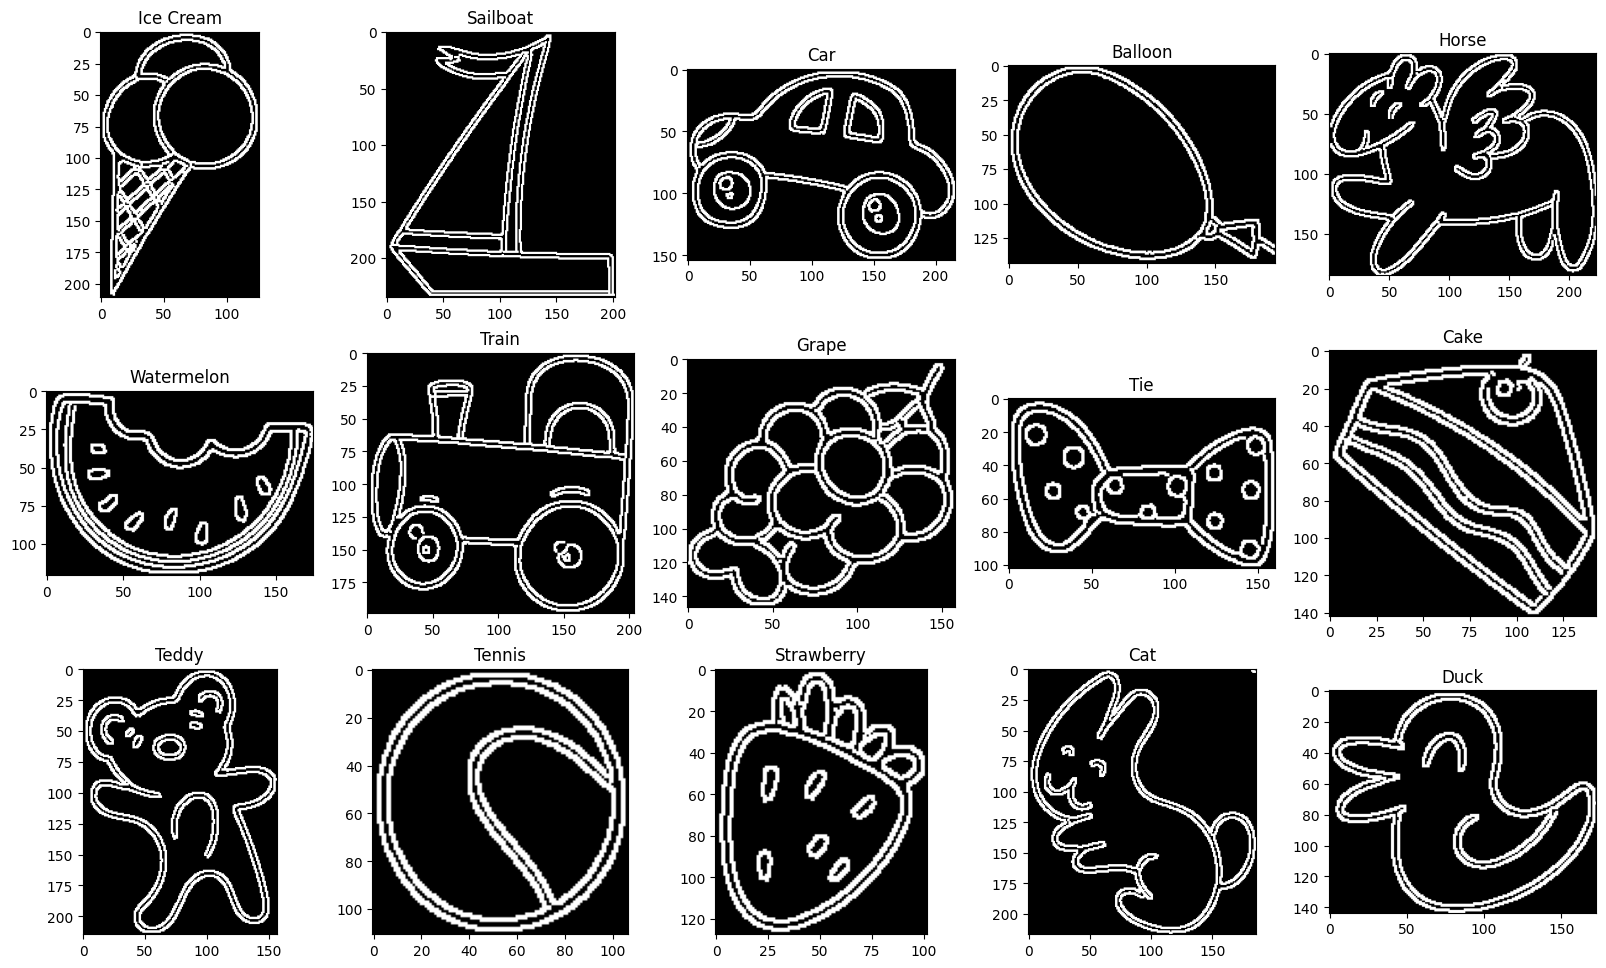

In [118]:
# Apply edge detection to object images
object_edges = []
for name, image_data in objects:
    object_edges.append(edge_detection(image_data))

plt.figure(figsize=(20, 20))
for i in range(len(objects)):
    plt.subplot(5, 5, i+1)
    plt.imshow(object_edges[i], cmap='gray')
    plt.title(objects[i][0])
plt.show()

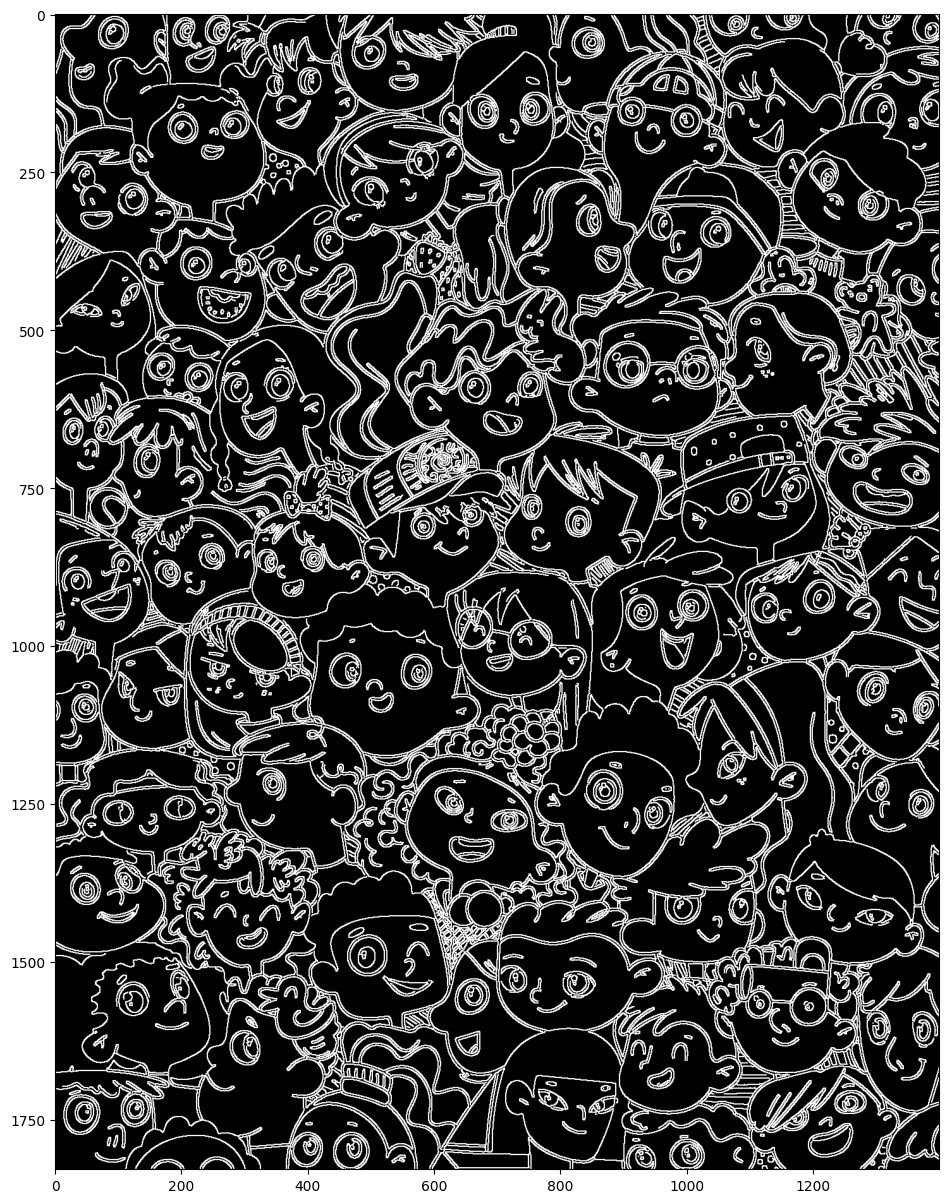

In [119]:
target_edges = edge_detection(target)
plt.figure(figsize=(15, 15))
plt.imshow(target_edges, cmap='gray')

In [120]:
def find_objects(target, objects, threshold=0.4):
    """Find objects in the target image based on template matching."""
    target_edges = edge_detection(target)
    results = []

    for i, (obj_name, obj_image) in enumerate(objects):
        obj_edges = edge_detection(obj_image)
        location, scale = improved_template_matching(target_edges, obj_edges, threshold)

        if location:
            results.append((i, (location, scale)))

    return results

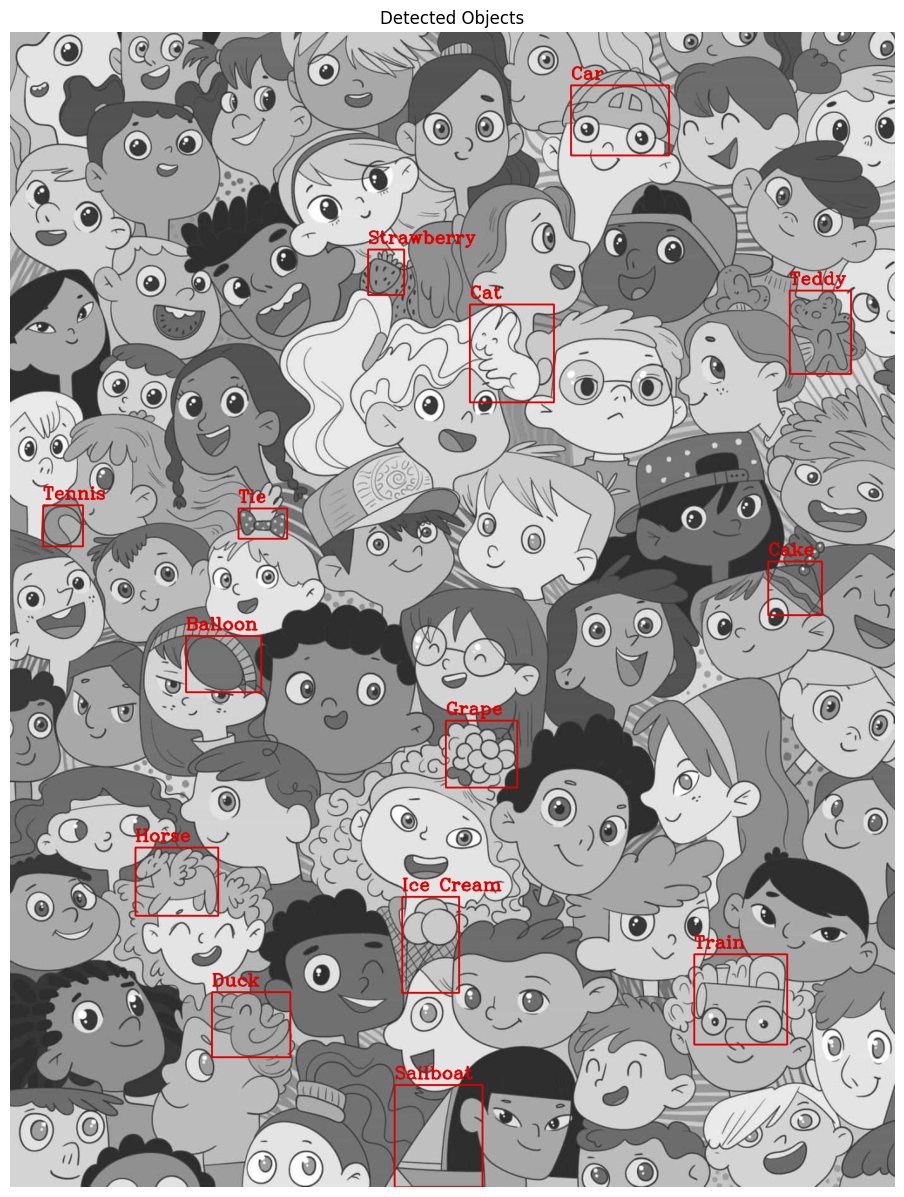

In [121]:
results = find_objects(target, objects)
result_image = draw_results(target, objects, results)

# Display the result
plt.figure(figsize=(15, 15))
plt.imshow(result_image)
plt.title('Detected Objects')
plt.axis('off')
plt.show()

##Hybrid

In [122]:
def find_objects(target, objects, threshold=0.4):
    """Find objects in the target image based on template matching using both edge detection and pixel matching."""
    results = []  # Initialize results list

    for i, (obj_name, obj_image) in enumerate(objects):
        # Try edge detection first
        target_edges = edge_detection(target)
        obj_edges = edge_detection(obj_image)
        location, scale = improved_template_matching(target_edges, obj_edges, threshold)

        if location:  # If edge detection found a match
            results.append((i, (location, scale)))
        else:
            # If edge detection fails, use pixel matching instead
            location, scale = improved_template_matching(target, obj_image, threshold)
            if location:  # If pixel matching finds a match
                results.append((i, (location, scale)))

    return results

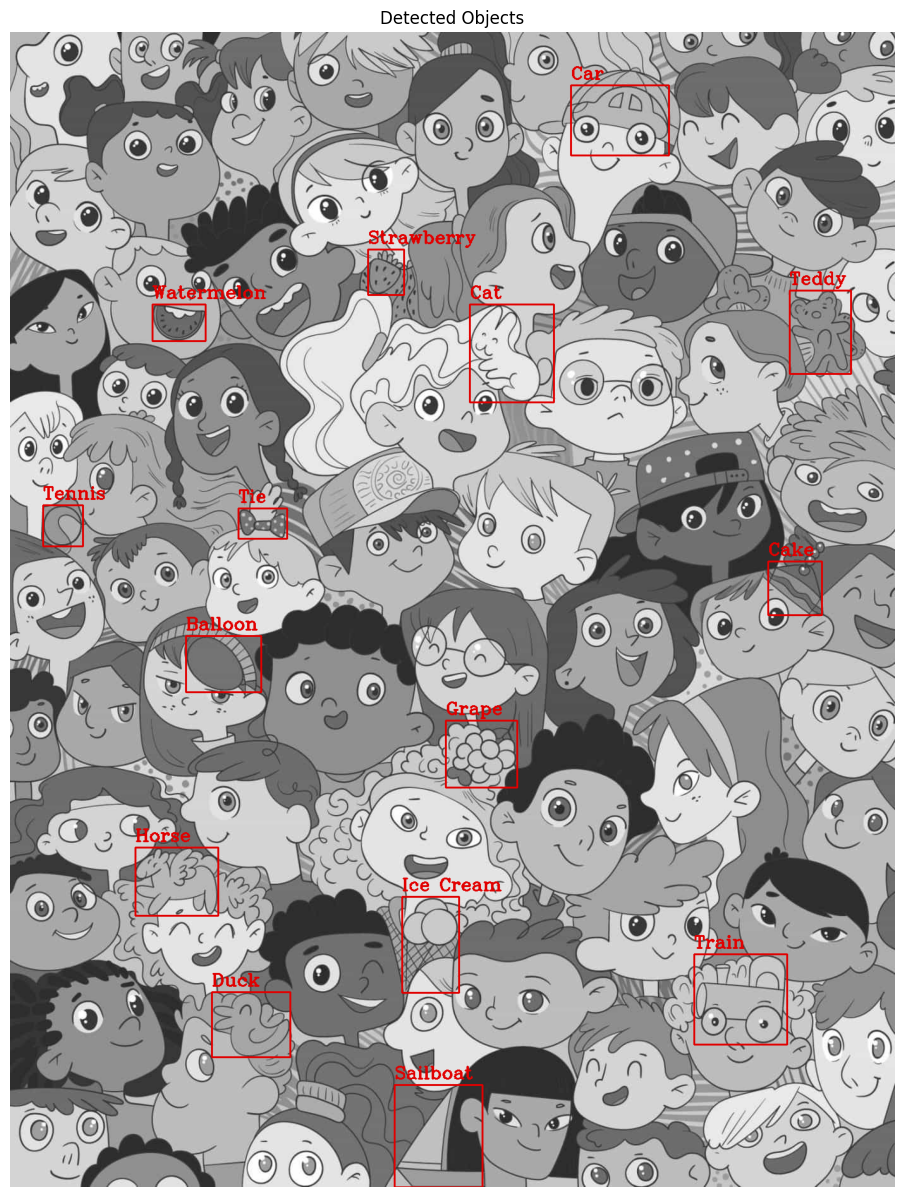

In [123]:
results = find_objects(target, objects)
result_image = draw_results(target, objects, results)

# Display the result
plt.figure(figsize=(15, 15))
plt.imshow(result_image)
plt.title('Detected Objects')
plt.axis('off')
plt.show()